In [2]:
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, precision_recall_fscore_support)

In [4]:
import spacy as sp
import matplotlib.pyplot as plt
import tensorflow as tf

import string
import random
import re
import math

from bs4 import BeautifulSoup

import tensorflow_datasets as tfds

In [5]:
import pandas as pd

caminho_do_arquivo = './train/utlc_movies.csv'
cols = ["review_text_tokenized", "polarity"]
train_data  = pd.read_csv(caminho_do_arquivo)

In [6]:
train_data.drop(['original_index', 'review_text', 
       'review_text_tokenized', 'rating', 'kfold_polarity',
       'kfold_rating'], axis=1, inplace=True)

In [7]:
train_data.fillna(0, inplace=True)

In [8]:
data = train_data
data.columns

Index(['review_text_processed', 'polarity'], dtype='object')

In [11]:
X = data.iloc[1:, 0].values
X

array(['o filme e realmente diferente e bem lento mas nao de uma forma ruim ou entediante, e muito interessante e chama atencao desde o inicio nos mantendo atentos ate o final. a atuacao da amy adams e muito boa e aqui onde ela realmente merecia uma indicacao ao oscar infelizmente foi esnobada, jeremy renner tambem esta otimo como sempre. fotografia muito boa e todas as tecnicas de som sao perfeitas, mereceu o oscar por melhor edicao de som porque e simplesmente perfeito o trabalho que fizeram com o som deste filme, quando os aliens se comunicam com a louise e fascinante. na minha opiniao nao e um filme convencional sobre ataque alienigena, e muito mais profundo que isso focando muito no drama, nao espere acao de "a chegada" porque definitivamente nao e um filme ao estilo "guerra dos mundos" e "independence day" (apesar de eu gostar de ambos os filmes citados), e realmente um drama psicologico bem intenso que nos mostra como a mente humana e limitada achando que tudo aquilo que e desco

In [12]:
y = data.iloc[1:, 1].values
y.shape

(59882,)

In [13]:
from sklearn.model_selection import train_test_split

X, _, y,_ = train_test_split(X, y, test_size = 0.85, stratify = y)   

In [14]:
y.shape, X.shape

((8982,), (8982,))

In [15]:
def clean_tweet(tweet):
    tweet = BeautifulSoup(tweet, 'lxml').get_text()
    
    tweet = re.sub(r'@', ' ', tweet)
    tweet = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', tweet)
    tweet = re.sub(r'\d+', ' ', tweet)
    tweet = tweet.replace("htt", "").replace("\n", "")
    tweet = re.sub(r' +', ' ', tweet)
    
    return tweet

In [16]:
nlp = sp.load("pt_core_news_sm")
stop_words = sp.lang.pt.STOP_WORDS

In [17]:
def clean_tweet2(tweet):
    tweet = tweet.lower()
    document = nlp(tweet)
    
    words = []
    for token in document:
        words.append(token.text)
    
    words = [word for word in words if word not in stop_words and word not in string.punctuation]
    words = ' '.join([str(element) for element in words])
    return words

In [18]:
# Aplicando em tudo
data_clean = [clean_tweet2(clean_tweet(tweet)) for tweet in X]
data_clean


/tmp/ipykernel_2081/2669493784.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()
/tmp/ipykernel_2081/2669493784.py:2: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  tweet = BeautifulSoup(tweet, 'lxml').get_text()


['gostei',
 'pesado mensagem ambiental escondida filme questao culpa paterna executada magistralmente',
 'poetico brutal gostei soube diferencia-los mensagem sensibilidade acaba so existe infelizmente',
 'realmente classico.roteiro direcao impecaveis .. oliver stone eh foda!ainda acho forcado nd apague brilhantismo filme.sem duvida melhor papel carreira michael douglas',
 'filmaco ... tom cruise raramente entra barco furado ...',
 'esperava filme',
 'louco engracado gostei filme',
 'lindissimo deu aperto coracao =(',
 'filmao porra trilha sonora entao',
 'filme legal ...',
 'vou repetir comentario filme feito atras preciso nao assistiu assistam pensar vezes!!!!que filme espetacular!!!!!quando acabou senti vontade aplaudir tamanha sensacao encantamento.se vou repetir disse comentario filme bruxa filme definitivamente nao serve geracao nao suporta filmes lentos profundos.querem ritmo frenetico explosoes minutos sexo gratuito violencia nao deem trabalho assistir vir criticar.e maravilhoso

In [19]:
data_labels = y
data_labels

array([1., 1., 1., ..., 1., 1., 0.])

In [20]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(data_clean, target_vocab_size = 2**16)

In [21]:
data_inputs = [tokenizer.encode(sentence) for sentence in data_clean]
data_inputs

[[216],
 [833, 222, 4986, 7548, 1, 306, 902, 6821, 2126, 17639],
 [1376, 3608, 20, 1366, 7674, 26081, 888, 222, 607, 228, 8, 407, 3041],
 [32,
  449,
  26082,
  16,
  65,
  2486,
  67,
  4497,
  1168,
  859,
  301,
  26069,
  4219,
  30,
  674,
  9506,
  25030,
  6105,
  13,
  26082,
  2026,
  201,
  9,
  126,
  583,
  416,
  21516],
 [620, 3, 152, 1260, 9037, 791, 11631, 19764, 29],
 [118, 13],
 [734, 231, 20, 13],
 [3891, 116, 3645, 1961, 8222],
 [893, 574, 18, 28, 1705],
 [1, 397, 29],
 [175,
  2237,
  740,
  1,
  98,
  363,
  377,
  2,
  1210,
  999,
  134,
  5063,
  5018,
  1063,
  1,
  1038,
  8216,
  3773,
  350,
  162,
  172,
  4200,
  1651,
  270,
  21198,
  26082,
  91,
  175,
  2237,
  507,
  740,
  1,
  2831,
  1,
  625,
  2,
  1543,
  1592,
  2,
  6446,
  7,
  7092,
  15372,
  26082,
  15154,
  352,
  3972,
  1942,
  189,
  572,
  7315,
  383,
  2,
  5967,
  138,
  24,
  1528,
  22640,
  26082,
  131,
  111,
  1291,
  625,
  1961,
  26082,
  240],
 [2, 1, 317, 10878, 25, 6

In [22]:
max_len = max(len(sentence) for sentence in data_inputs)

In [23]:
data_inputs = tf.keras.preprocessing.sequence.pad_sequences(
    data_inputs,
    value = 0,
    padding = 'post',
    maxlen=max_len
)
data_inputs

array([[ 216,    0,    0, ...,    0,    0,    0],
       [ 833,  222, 4986, ...,    0,    0,    0],
       [1376, 3608,   20, ...,    0,    0,    0],
       ...,
       [1996,    0,    0, ...,    0,    0,    0],
       [ 645,  670,    1, ...,    0,    0,    0],
       [ 232,   32,  103, ...,    0,    0,    0]], dtype=int32)

In [24]:
train_inputs, test_inputs, trains_labels, test_labels = train_test_split(
    data_inputs,
    data_labels,
    test_size=0.1,
    stratify = data_labels
)

In [25]:

nb = MultinomialNB()
nb.fit(train_inputs, trains_labels)
y_pred = nb.predict(test_inputs)

In [26]:
print(classification_report(test_labels, y_pred))

              precision    recall  f1-score   support

         0.0       0.27      0.18      0.21       263
         1.0       0.70      0.80      0.75       636

    accuracy                           0.62       899
   macro avg       0.49      0.49      0.48       899
weighted avg       0.57      0.62      0.59       899



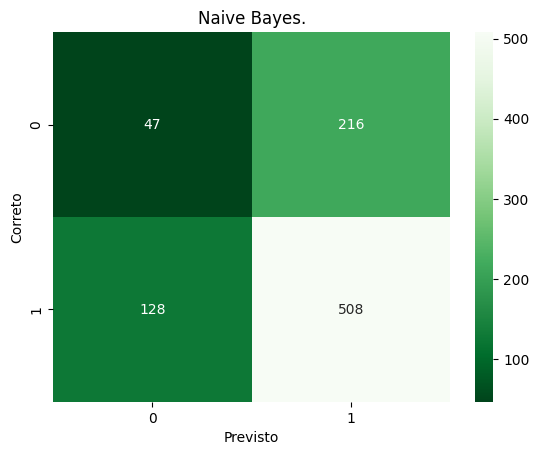

In [27]:
ax = sns.heatmap(confusion_matrix(test_labels, y_pred), cmap='Greens_r', annot=True, fmt='d')
_ = ax.set(xlabel='Previsto', ylabel='Correto', title='Naive Bayes.')

In [29]:
#Calculando a acurácia
acc = accuracy_score(y_pred, test_labels)
precision_recall_fscore = precision_recall_fscore_support(y_pred, test_labels, average="weighted")
print(f'Acurácia: {acc}')
print(f'\nResult: {precision_recall_fscore}')

Acurácia: 0.6173526140155728

Result: (0.6780456868016194, 0.6173526140155728, 0.6434123090777139, None)
